In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

# Bank Analysis

So, the bank turns to you for help: it wants to develop a loyalty campaign to retain customers, but for this it needs you to find out the main reasons for the outflow of customers. In other words, it is necessary ** to establish how the departed customers differ from the loyal ones and how the various signs that define customers** are related to each other.

After an intelligence analysis, in order to identify the most important signs of outflow, the bank will be able to build a machine learning model that will predict the client's departure.

→ You will have to prepare **a mini-report on the work done in the form of a notebook **, which you will provide to the mentor for verification. The report should contain answers to the questions below in the form of a graph and detailed conclusions that you can draw from it.

## TASKS

9.1. What is the ratio of departed and loyal customers? Show it on the graph and give a comment on the ratio.

9.2. Build a graph showing the balance distribution of users who have more than $2,500 in their account. Describe the distribution and draw conclusions.

9.3. Look at the distribution of the client's balance in the context of the outflow sign. How do the amounts on the savings account of departed and loyal customers differ? Think about it and write down what this may be related to, what may not suit the departed customers in the bank.

9.4. Look at the distribution of age in the context of the outflow sign. Which group has more potential emissions? What age category of customers should the bank pay attention to?

9.5. Build a graph that shows the relationship between the client's credit rating and his estimated salary. Add a coloring based on customer churn. What is the relationship between the signs? If you don't see an explicit relationship, indicate it.

9.6. Who leaves more often, men or women? Build a graph that illustrates this.

Hint
9.7. How does the outflow of customers depend on the number of services purchased from the bank? To answer this question, build a multi-level bar chart.

9.8. How does the presence of an active client status affect the outflow of clients? Build a diagram illustrating this. What would you suggest to the bank to reduce the outflow of customers among the inactive?

9.9. In which country is the share of departed customers greater? Build a thermal cartogram that will show this ratio on the world map. Imagine what this might be related to.

9.10. Turn the CreditScore numeric attribute into a categorical one. To do this, use the get_credit_score_cat() function, which is given below. Apply it to the CreditScore column and create a new CreditScoreCat attribute — the credit rating category.

Build a summary table, the rows of which are the categories of credit rating (CreditScoreCat), and the columns are the number of years during which the client uses the bank's services (Tenure). The cells of the summary table should contain the average on the basis of outflow (Exited) — the proportion of users who left.

Based on the resulting summary table, build a heat map with an annotation. Find on the heat map the categories of customers who leave most often.

So, to begin with, we consider the original file_table and see what it consists of:

In [35]:
churn_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Table Columns:

- *RowNumber* — the row number of the table (this is unnecessary information, so you can get rid of it right away)
- *CustomerID* — customer ID
- *Surname* — last name of the client
- *CreditScore* — the client's credit rating (the higher it is, the more the client took out loans and returned them)
- *Geography* — client's country (international bank)
- *Gender* — client's gender
- *Age* — the age of the client
- *Tenure* — how many years the client has been using the bank's services
- *Balance* — the balance on the client's bank accounts
- *NumOfProducts* — the number of bank services that the customer has purchased
- *HasCrCard* — does the customer have a credit card (1 — yes, 0 — no)
- *IsActiveMember* — does the client have the status of an active bank client (1 — yes, 0 — no)
- *EstimatedSalary* — estimated salary of the client
- *Exited* — loyalty status (1 — departed customer, 0 — loyal customer)

## Execution

**9.1.** What is the ratio of departed and loyal customers? Show it on the graph and give a comment on the ratio.

Text(0.5, 1.0, "Status of the client's relationship to the bank")

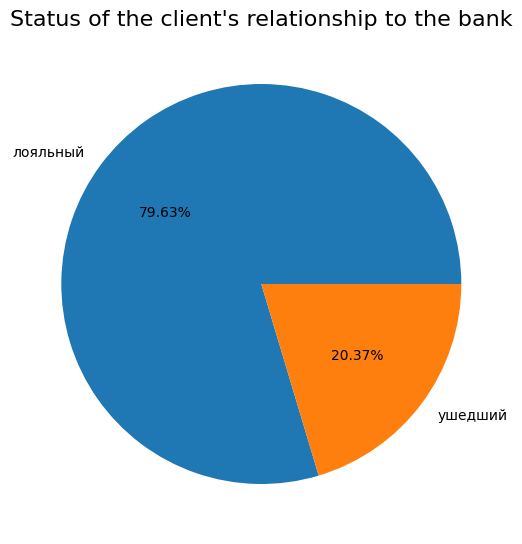

In [8]:
##Let's build a pie chart
#We will save in line_data information about the number of 1-departed and 0-loyal customers
line_data = churn_data['Exited'].value_counts()
#Replace the name in line_data and with its 1 name gone, and 0 loyal
line_data = line_data.rename(index={1:'ушедший',0:'лояльный'})

#create and set the chart size
fig = plt.figure(figsize=(5,5))
#set the margins and the location of the graph
axes = fig.add_axes([0,0,1,1])
##draw a pie chart
axes.pie(
    line_data,                  # values that will be used to build the chart
    labels = line_data.index,   #labels corresponding to values
    autopct = '%.2f%%',         #specify the format for displaying the shares
)
#let's give a name to the diagram
axes.set_title ("Status of the client's relationship to the bank",fontsize=16)

Conclusion: the graph shows that the percentage of departed customers is more than 20%, which is not a positive sign. Additional research is needed, the reasons affecting this indicator and the development of solutions to reduce it.

**9.2.** Build a graph showing the balance distribution of users who have more than $2,500 in their account. Describe the distribution and draw conclusions.

In [9]:
#Let's build a box graph
#we will make a selection for clients whose balance is more than $ 2500
box_data = churn_data[churn_data['Balance']>2500]
#combine the value 0 - loyal and 1 -gone, into 'common' for ease of visualization
box_data['Exited'] = churn_data['Exited'].apply(lambda x: 'shared' if x==1 else'shared').astype('object')

#to solve task 9.2. we use the box() method (box diagram)
fig = px.box(
    data_frame = box_data,  #Data Frame, according to which the diagram will be built
    x = 'Balance',          #Values along the abscissa axis
    y = 'Exited',           #Values along the ordinate axis
    height = 400,           #chart height
    width = 1000,           #width of the graph
    title = "Distribution by the amount of each client's contribution", #name of the graph
)
#We display the graph on the screen
fig.show() 

C:\Users\AAPun\AppData\Local\Temp\ipykernel_18860\2455465861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_data['Exited'] = churn_data['Exited'].apply(lambda x: 'shared' if x==1 else'shared').astype('object')


Conclusion: the graph shows what amounts are on the accounts of customers, the maximum and minimum values. Basically, the amount on customer accounts ranges from 100 thousand dollars to 140 thousand dollars. As well as the q1 quartile on the graph, it says that 25% of all customers with a deposit of less than 100 thousand dollars, and the q3 quantile shows that 25% of all customers with a deposit of more than 140 thousand dollars.

**9.3.** Look at the distribution of the client's balance in the context of the outflow sign. How do the amounts on the savings account of departed and loyal customers differ? Think about it and write down what this may be related to, what may not suit the departed customers in the bank.

In [10]:
#rename the value 0 - loyal and 1 -departed, for ease of visualization
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'departed' if x==1 else'loyal').astype('object')
box_data1 = churn_data
#we will make a selection for clients whose balance is more than $ 2500
box_data1 = churn_data[churn_data['Balance']>2500]

#Let's build a box diagram
fig1 = px.box(
    data_frame = box_data1, 
    x = 'Balance',
    y = 'Exited',
    points="all",           #show points
    height = 600,           #chart height
    width = 1000,           #width of the graph
    title = "Distribution by the amount of each client's contribution",
)
fig1.show()

**Conclusion:** the graph shows what amounts are on the accounts of customers, the maximum and minimum values. It can be seen that depending on the type of client, whether it is departed or loyal, the picture is approximately the same. Basically, the amount on customer accounts is *from 100000 up to 140000*. The dots more clearly display the individual account balance of each client. The reason for the outflow could be not the reliability of the bank, poor work of the bank's employees, weak advertising and not relevant advertising policy, too high interest rates on loans and low deposits in relation to competitors. The slow operation of the bank and the lack of customer support are others, but we will try to deduce further possible problems from the existing signs.

**9.4.** Look at the distribution of age in the context of the outflow sign. Which group has more potential emissions? What age category of customers should the bank pay attention to?

In [11]:
#Filter out the data outflow of the data frame and create a new sent
departed_client = churn_data[(churn_data['Exited']=='departed')&(churn_data['Balance']>2500)]

In [12]:
#Let's group the data by age, and as a value, the total balance
line_data = departed_client.groupby(
    by='Age'
)['Balance'].sum()
#You can view the information of quantitative values
#line_data

<AxesSubplot: title={'center': 'Dependence of departed clients on age and balance'}, xlabel='Age'>

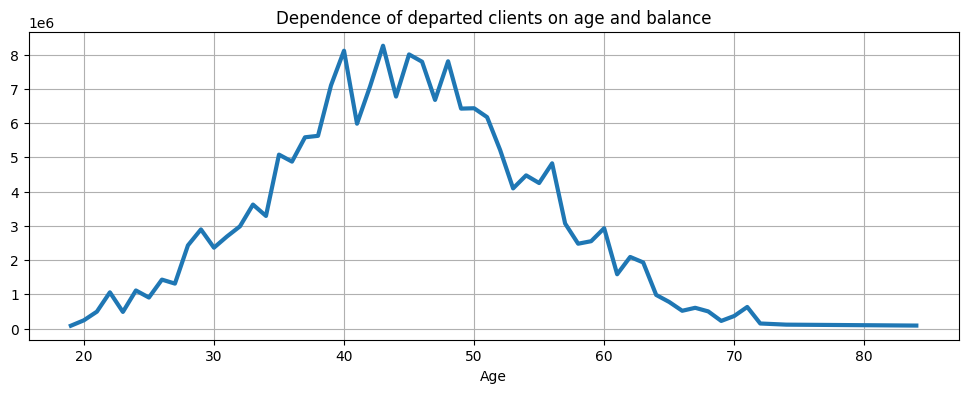

In [13]:
#Draw a line graph
line_data.plot(
    kind = 'line', # selecting a linear graph type 
    figsize = (12,4), #graph size
    title = 'Dependence of departed clients on age and balance',#title
    grid = True, #Output the grid
    lw = 3 #line width
)

**Conclusion:** it can be seen from the graph that the largest share of the account balance is among people in the age category from 35 to 55 years. The main focus will be on this age group.

**9.5.** Build a graph that shows the relationship between the client's credit rating and his estimated salary. Add a coloring based on customer churn. What is the relationship between the signs? If you don't see an explicit relationship, indicate it.

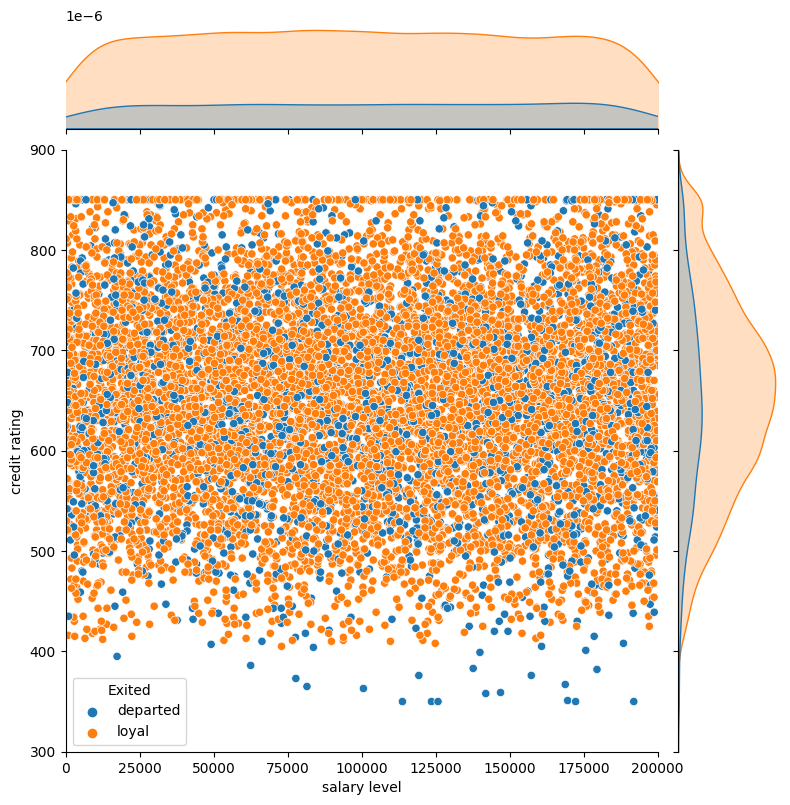

In [14]:
#Draw a distribution graph
jointplot1 = sns.jointplot(
    data=churn_data,        #DataFrame where the values come from
    x='EstimatedSalary',    #salary level on the abscissa axis
    y='CreditScore',        #credit rating on the ordinate axis
    hue='Exited',           #grouping categorical attribute
    xlim = (0, 200000),     #range of values along the abscissa axis
    ylim = (300, 900),      #range of values along the ordinate axis
    height=8,               #size
)
jointplot1.set_axis_labels('salary level','credit rating')

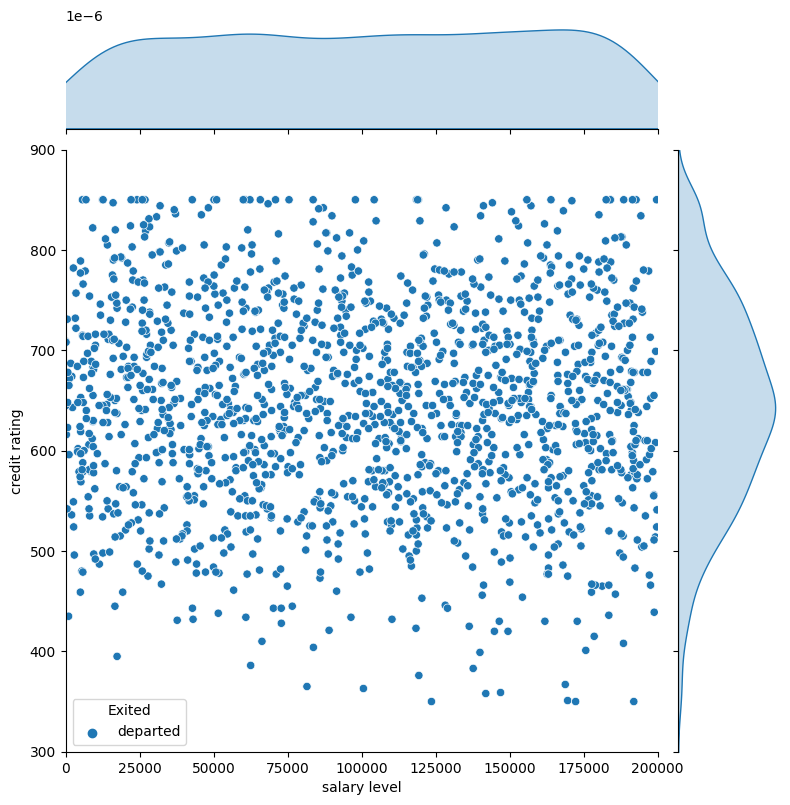

In [15]:
#Let's build a distribution schedule, but only from the departed customers for clarity
jointplot = sns.jointplot(
    data=departed_client,   #DataFrame where the values come from
    x='EstimatedSalary',    #salary level on the abscissa axis
    y='CreditScore',        #credit rating on the ordinate axis
    hue='Exited',           #grouping categorical attribute
    xlim = (0, 200000),     #range of values along the abscissa axis
    ylim = (300, 900),      #range of values along the ordinate axis
    height=8                #size
)
jointplot.set_axis_labels('salary level','credit rating')

**Conclusion 9.5:** we displayed 2 graphs of the distribution of the credit rating and the level of salaries of customers, the second graph showed the dynamics among just departed customers.  There is no strict dependence on the graphs. It can be highlighted that the average rating level of the majority is from 600-700.

**9.6.** Who leaves more often, men or women? Build a graph that illustrates this.

In [16]:
#Let's highlight how many male and female clients there are in total
F_or_M_all = churn_data['Gender'].value_counts()
F_or_M_all

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
#We allocate how many male and female clients from among the departed clients
F_or_M = departed_client['Gender'].value_counts()
F_or_M

Female    849
Male      688
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Dependence of departed clients on gender')

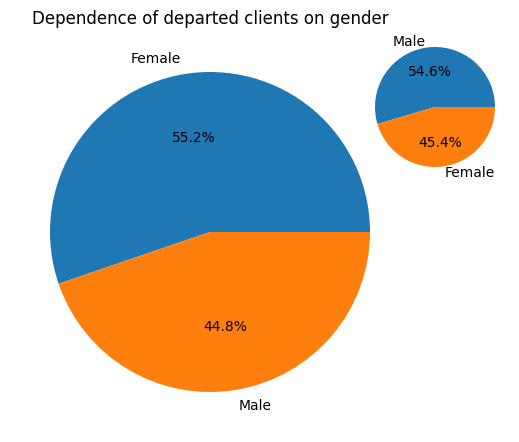

In [18]:
#Let's build a pie chart
fig = plt.figure(figsize=(5,5))
#set the margins and the location of the graph
axes = fig.add_axes([0,0,0.8,0.8])
# let's draw a pie chart
axes.pie(
    F_or_M,                     # values by which the diagram will be constructed
    labels = F_or_M.index,
    autopct = '%.1f%%',         #specify the format for displaying the shares
    explode = [0,0]
)
insert_axes = fig.add_axes([0.7, 0.5, 0.3, 0.3])
insert_axes.pie(
    F_or_M_all,
    labels = F_or_M_all.index,  # values by which the chart will be built
    autopct = '%.1f%%',         #specify the format for displaying the shares
    explode = [0,0]
)
axes.set_title('Dependence of departed clients on gender')

**Conclusion 9.6:** On the big circle, it is clear that the number of women who have left is 10% more than men, although from the total number of clients, this small circle shows the opposite, that men are 10% more than men. This suggests that women are not satisfied with something in the bank.

**9.7.** How does the outflow of customers depend on the number of services purchased from the bank? To answer this question, build a multi-level bar chart.

In [19]:
pro_group = churn_data.groupby(by='NumOfProducts')['Exited'].value_counts()
pro_group

NumOfProducts  Exited  
1              loyal       3675
               departed    1409
2              loyal       4242
               departed     348
3              departed     220
               loyal         46
4              departed      60
Name: Exited, dtype: int64

<AxesSubplot: xlabel='NumOfProducts,Exited'>

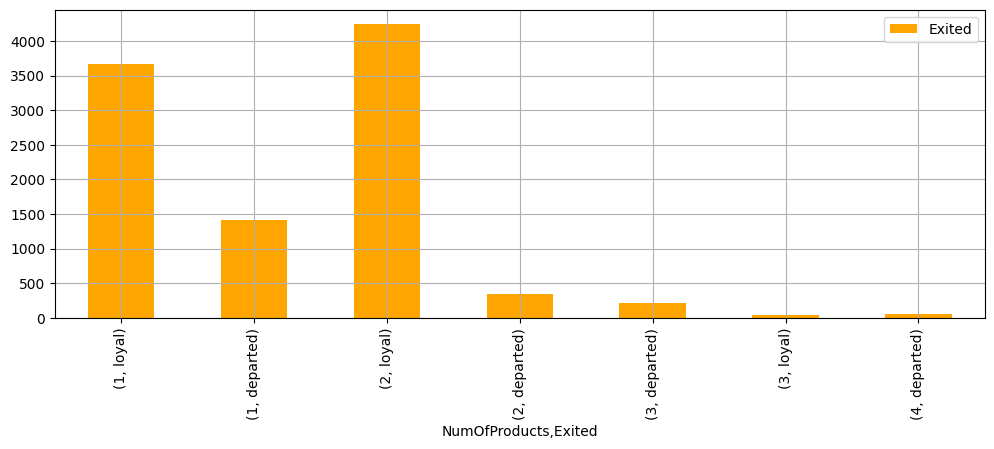

In [20]:
pro_group = churn_data.groupby(by='NumOfProducts')['Exited'].value_counts()

#Let's build a bar chart
pro_group.plot(
    kind='bar',         #columnar graph type
    grid=True,          #grid image on the graph
    figsize=(12, 4),    #graph size
    legend=True,        #legend output on the chart
    color = 'orange'    #column color
)

**Conclusion 9.7:** the graph shows that the greatest demand for 1 and 2 services of the bank. Those customers who used 4 services simply left the bank. Clients who have used 1 service also have a large number of departed clients in the number of 1409 people, it is with this group that you need to work, additional information is needed on the type of services and what kind of service repels customers.

**9.8**. How does the presence of an active client status affect the outflow of clients? Build a diagram illustrating this. What would you suggest to the bank to reduce the outflow of customers among the inactive?

In [21]:
#Group the table by Is Active Member and Exited, by the number of clients
group_98 = churn_data.groupby(
    by='IsActiveMember'
)['Exited'].value_counts()
group_98

IsActiveMember  Exited  
0               loyal       3547
                departed    1302
1               loyal       4416
                departed     735
Name: Exited, dtype: int64

<AxesSubplot: xlabel='IsActiveMember,Exited'>

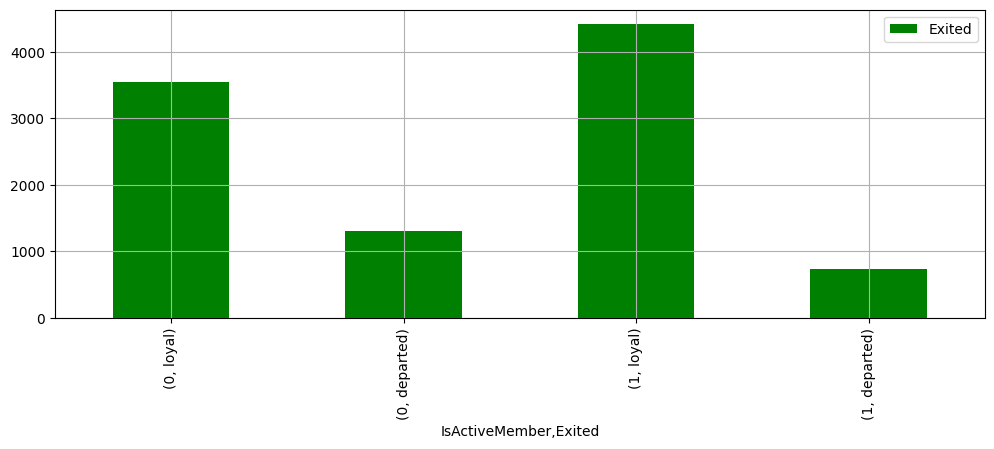

In [22]:
#Let's build a columnar graph
group_98.plot(
    kind='bar',         #chart type
    grid=True,          #with grid
    figsize=(12, 4),    #graph size
    legend=True,        #with legend
    color = 'green'     #column color
)

**Conclusion 9.8:** If the client is active from the schedule, then the probability that he will leave is less than vice versa. It is necessary to motivate people to take a more active part, which means to organize contests, sweepstakes, make information the simplest and most convenient, understandable for the user and convey it to him.

**9.9.** In which country is the share of departed customers greater? Build a thermal cartogram that will show this ratio on the world map. Imagine what this might be related to.

In [23]:
#reading the data frame in pure form
churn_data = pd.read_csv('data/churn.csv')

#Filter the data outflow into a new Data Frame, where only the departed clients in the 'Exited' column
departed_client = churn_data[churn_data['Exited'] == 1]

#Let's add the column 'departed', which shows  
#percentage of abandoned customers out of the total number of abandoned customers
x = departed_client['Exited'].count()
departed_client['departed_per'] = (departed_client['Exited'])/x*100

#sort the sent client by 'Tenure'
departed_client = departed_client.sort_values(by='Tenure')

C:\Users\AAPun\AppData\Local\Temp\ipykernel_18860\1913049937.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# Create a pivot table
group_table = departed_client.groupby(
    by=['Tenure','Geography']
)['departed_per'].sum().round(2)
#You can view the values
group_table

Tenure  Geography
0       France       1.72
        Germany      1.77
        Spain        1.18
1       France       4.07
        Germany      5.15
        Spain        2.16
2       France       4.42
        Germany      3.14
        Spain        2.31
3       France       4.07
        Germany      4.12
        Spain        2.26
4       France       4.17
        Germany      3.73
        Spain        2.06
5       France       3.73
        Germany      4.42
        Spain        2.11
6       France       3.78
        Germany      3.73
        Spain        2.11
7       France       3.73
        Germany      2.99
        Spain        1.96
8       France       3.39
        Germany      4.27
        Spain        2.01
9       France       4.32
        Germany      4.57
        Spain        1.57
10      France       2.36
        Germany      2.06
        Spain        0.54
Name: departed_per, dtype: float64

In [25]:
# let's translate the pivot table into a DataFrame
group_table = pd.DataFrame(group_table) 
# convert indexes ['Tenure','Geography'] to columns
departed_client_new = group_table.reset_index()

In [26]:
#Let's build a heat map showing the percentage of those who left
#of clients for the number of years of using the bank's services
fig = px.choropleth(
    data_frame=departed_client_new,     #DataFrame
    locations='Geography',              #column with locations
    locationmode = "country names",     #location mapping mode with the Plotli database
    color='departed_per',               #what color depends on
    animation_frame="Tenure",           #animation slider
    range_color=[0, 5],                 #color range
    title='Global',                     #title
    width=800,                          #width
    height=500,                         #height
    color_continuous_scale='ylorbr'     #color palette
)
#displaying the graph
fig.show()

**Conclusion 9.9:** the heat map shows the trends of customer outflow by country in percentage terms. The highest value is Germany 5.15% in one year. So we can conclude that in Germany and France, the outflow of customers is about 4% on average, and in Spain about 2%. In general, we can say that the number of clients who have left the country does not change, other reasons need to be considered.

**9.10.** Convert the numeric attribute of Credit Score to categorical. To do this, use the get_credit_score_cat() function, which is given below. Apply it to the CreditScore column and create a new CreditScoreCat attribute — the credit rating category.

In [27]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Build a summary table, the rows of which are the categories of credit rating (CreditScoreCat), and the columns are the number of years during which the client uses the bank's services (Tenure). The cells of the summary table should contain the average on the basis of outflow (Exited) — the proportion of users who left.

Based on the resulting summary table, build a heat map with an annotation. Find on the heat map the categories of customers who leave most often.

In [28]:
churn_data = pd.read_csv('data/churn.csv')
#Let's sort the outflow of data by the outflow of data by the period of ownership
churn_data = churn_data.sort_values(by=['Tenure'])

In [29]:
#Creating a new CreditScoreCat attribute in churn_data
churn_data['CreditScoreCat'] = churn_data ['CreditScore'].apply (get_credit_score_cat)

In [30]:
#Create a pivot table
pivot_table_ch = churn_data.pivot_table(
    values = 'Exited', #
    index = 'CreditScoreCat',
    columns= 'Tenure',
    aggfunc = 'mean',
    fill_value = 0
)
pivot_table_ch

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(0.5, 1.0, 'Dependence of credit rating and number of years')

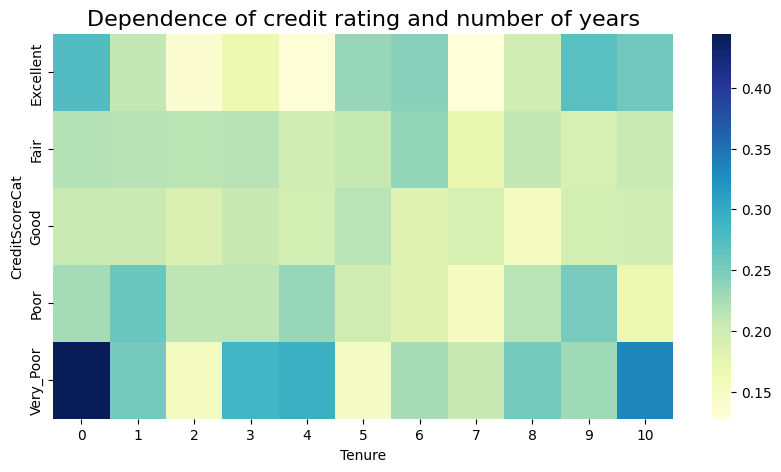

In [31]:
fig = plt.figure(figsize=(10,5)) #chart size
#Create a heat map
heatmap = sns.heatmap(data=pivot_table_ch, cmap='YlGnBu')
#name 
heatmap.set_title('Dependence of credit rating and number of years', fontsize=16)

**Conclusion 9.10:** the heat map shows that people with a bad credit rating most often leave the bank, in principle, this is not bad, because why does the bank need customers who do not fulfill their obligations. But there are also alarm bells, where customers with an '*Excellent*' rating leave the bank in *25-35%* of cases. It is necessary to conduct additional observations on why customers with a rating (*Good*, *Fair*, *Excellent*) tend to leave the bank *in 20 cases out of 100*.